In [3]:
from scipy.integrate import quad
import numpy as np


#alpha = 0.25
omegaD = 1

def J(omega,alpha):
    return 2*alpha*np.exp(-omega/omegaD)

def f(t, omega):
    return 4* np.sin(omega*t/2)**2/omega**2

def b(omega, t):
    alpha = 1
    return J(omega, alpha) *f(t,omega)


# Compute the definite integral from 0 to π
result, error = quad(b, 0, np.inf)

print("Integral result:", result)
print("Estimated error:", error)

Integral result: 1.7552982924698066
Estimated error: 1.4478911917139192e-08


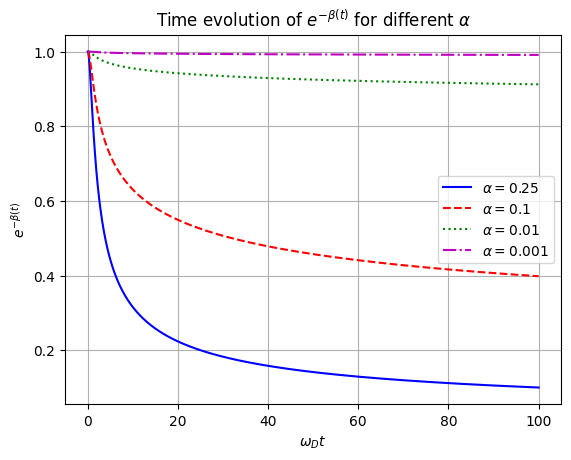

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega_D = 1
t = np.linspace(0, 100, 1000)  # Avoid t = 0 to prevent singularity
omegaDt = omega_D * t

# Different alpha values
alphas = [0.25, 0.1, 0.01, 0.001]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [r'$\alpha=0.25$', r'$\alpha=0.1$', r'$\alpha=0.01$', r'$\alpha=0.001$']

# Plot e^{-β(t)} = (1 + ω_D^2 t^2)^{-α}
for alpha, style, label in zip(alphas, styles, labels):
    y = (1 + omega_D**2 * t**2) ** (-alpha)
    plt.plot(omegaDt, y, style, label=label)

plt.xlabel(r'$\omega_D t$')
plt.ylabel(r'$e^{-\beta(t)}$')
plt.title('Time evolution of $e^{-\\beta(t)}$ for different $\\alpha$')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\topal\AppData\Local\Temp\ipykernel_57752\2674377379.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(J, 0, np.inf, args=(t, omega_D))


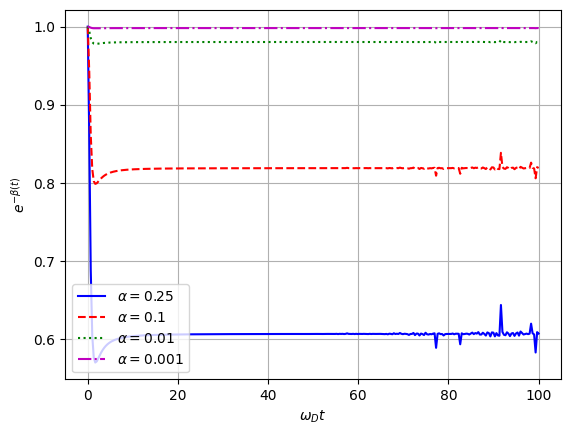

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import jv 

omega_D = 1
t_vals = np.linspace(0.01, 100, 300)
omegaDt = omega_D * t_vals

alphas = [0.25, 0.1, 0.01, 0.001]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [r'$\alpha=0.25$', r'$\alpha=0.1$', r'$\alpha=0.01$', r'$\alpha=0.001$']


def J(omega, t, omega_D):
    return omega * np.exp(-omega / omega_D) * np.sin(omega * t / 2)**2

for alpha, style, label in zip(alphas, styles, labels):
    beta_vals = []
    for t in t_vals:
        integral, _ = quad(J, 0, np.inf, args=(t, omega_D))
        beta_t = 4 * alpha * integral
        beta_vals.append(np.exp(-beta_t))
    
    plt.plot(omegaDt, beta_vals, style, label=label)

plt.xlabel(r'$\omega_D t$')
plt.ylabel(r'$e^{-\beta(t)}$')
plt.grid(True)
plt.legend()
plt.show()


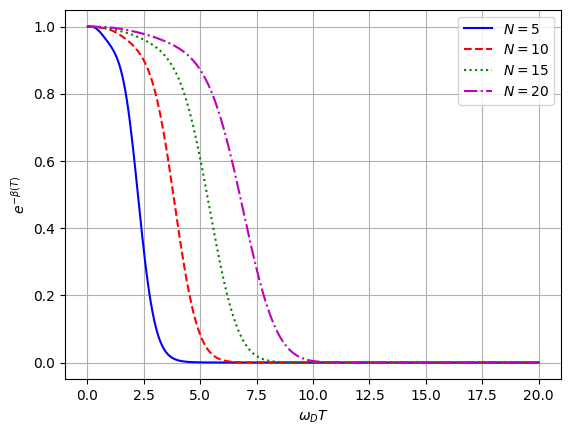

In [30]:
omega_D = 1
alpha = 0.25
T_vals = np.linspace(0.01, 20, 300)
omegaDT = omega_D * T_vals

N_vals = [5, 10, 15, 20]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [rf'$N={N}$' for N in N_vals]

def J(omega, alpha, omega_D):
    return 2 * alpha * omega**3 * np.exp(-omega / omega_D)

def cpmg(omega, T, N):
    if N % 2 == 0:  
        return (4 / omega**2) * np.tan(omega * T / (2 * N + 2))**2 * np.cos(omega * T / 2)**2
    else: 
        return (4 / omega**2) * np.tan(omega * T / (2 * N + 2))**2 * np.sin(omega * T / 2)**2

def integrand(omega, T, alpha, N, omega_D):
    return J(omega, alpha, omega_D) * cpmg(omega, T, N)


for N, style, label in zip(N_vals, styles, labels):
    beta_vals = []
    for T in T_vals:
        result, _ = quad(integrand, 0.01, 50, args=(T, alpha, N, omega_D))
        beta_vals.append(np.exp(-result))
    
    plt.plot(omegaDT, beta_vals, style, label=label)

plt.xlabel(r'$\omega_D T$')
plt.ylabel(r'$e^{-\beta(T)}$')
plt.grid(True)
plt.legend()
plt.show()


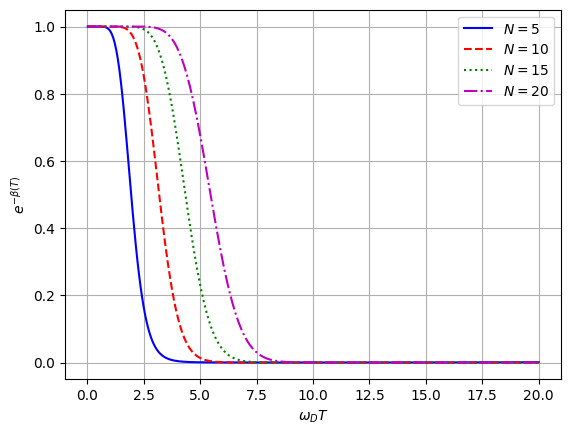

In [32]:
omega_D = 1
alpha = 0.25
T_vals = np.linspace(0.01, 20, 300)
omegaDT = omega_D * T_vals

N_vals = [5, 10, 15, 20]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [rf'$N={N}$' for N in N_vals]

def J(omega, alpha, omega_D):
    return 2 * alpha * omega**3 * np.exp(-omega / omega_D)

def udd(omega, T, N):
    arg = omega * T / 2
    return (16 * (N + 1)**2 / omega**2) * jv(N + 1, arg)**2

def integrand(omega, T, alpha, N, omega_D):
    return J(omega, alpha, omega_D) * udd(omega, T, N)

for N, style, label in zip(N_vals, styles, labels):
    beta_vals = []
    for T in T_vals:
        result, _ = quad(integrand, 0.01, 50, args=(T, alpha, N, omega_D)) 
        beta_vals.append(np.exp(-result))
    
    plt.plot(omegaDT, beta_vals, style, label=label)

plt.xlabel(r'$\omega_D T$')
plt.ylabel(r'$e^{-\beta(T)}$')
plt.grid(True)
plt.legend()
plt.show()
